# Final Project

## Introduction

**Team:** Brian </br>
**Aproach:** Picking the best neighborhood in Pittsburgh is not an easy task. At first, I approached the task through the lens of a general standard of what people would look for at first glance such as the neighborhood's aesthetics and visual attractiveness. However, it felt somewhat shallow to scale it in this way. So, I decided to approach it from where my values were. Throughout my childhood, I moved nearly every year until I entered highschool. During this time, my parents always taught me that I should always look for a few important things when moving to a new home. Therefore, I decided that I wanted to see which neighborhood my parents would aprove of the most. Because of this, I chose the neighborhood best for a cautious and mindful family to move in to.

## Metric

**Metric:** Best neighborhood for a family to settle in </br>
**Measurement:** Rating (1-20)

**Submetric 1:** Safety
- **Dataset 1:** Crime Incidents
- **Dataset 2:** Low-Level Criminal Offenses
- **Dataset 3:** Population Size
- **Measurement:** Rating (1-20)

**Submetric 2:** Education
- **Dataset 1:** Educational Attaintment
 - Regular Highschool Diploma
 - Bachelors Degree
- **Dataset 2:** Population Size
- **Measurement:** Rating (1-20)

**Submetric 3:** Cost of Living
- **Dataset 1:** Rent
- **Dataset 2:** Mortgage
- **Measurement:** Rating (1-20)

## The Best Neighborhood

### **SUBMETRIC 1: SAFETY** 

#### First I will use the formula: (Crime Incident + Low-Level Criminal Offense)/(Population) to give each neighborhood a crime score. From there, I will I will break up the crime scores into fifth percentiles which correlate to a revised score from 1-20 (1 being 100th percentile and 20 being 5th percentile). To clarify, the lower score should be higher crime, so the revised score inverts the crime scores appropriately. </br>
#### The data was collected from a thirty day period prior to 11/14/2023

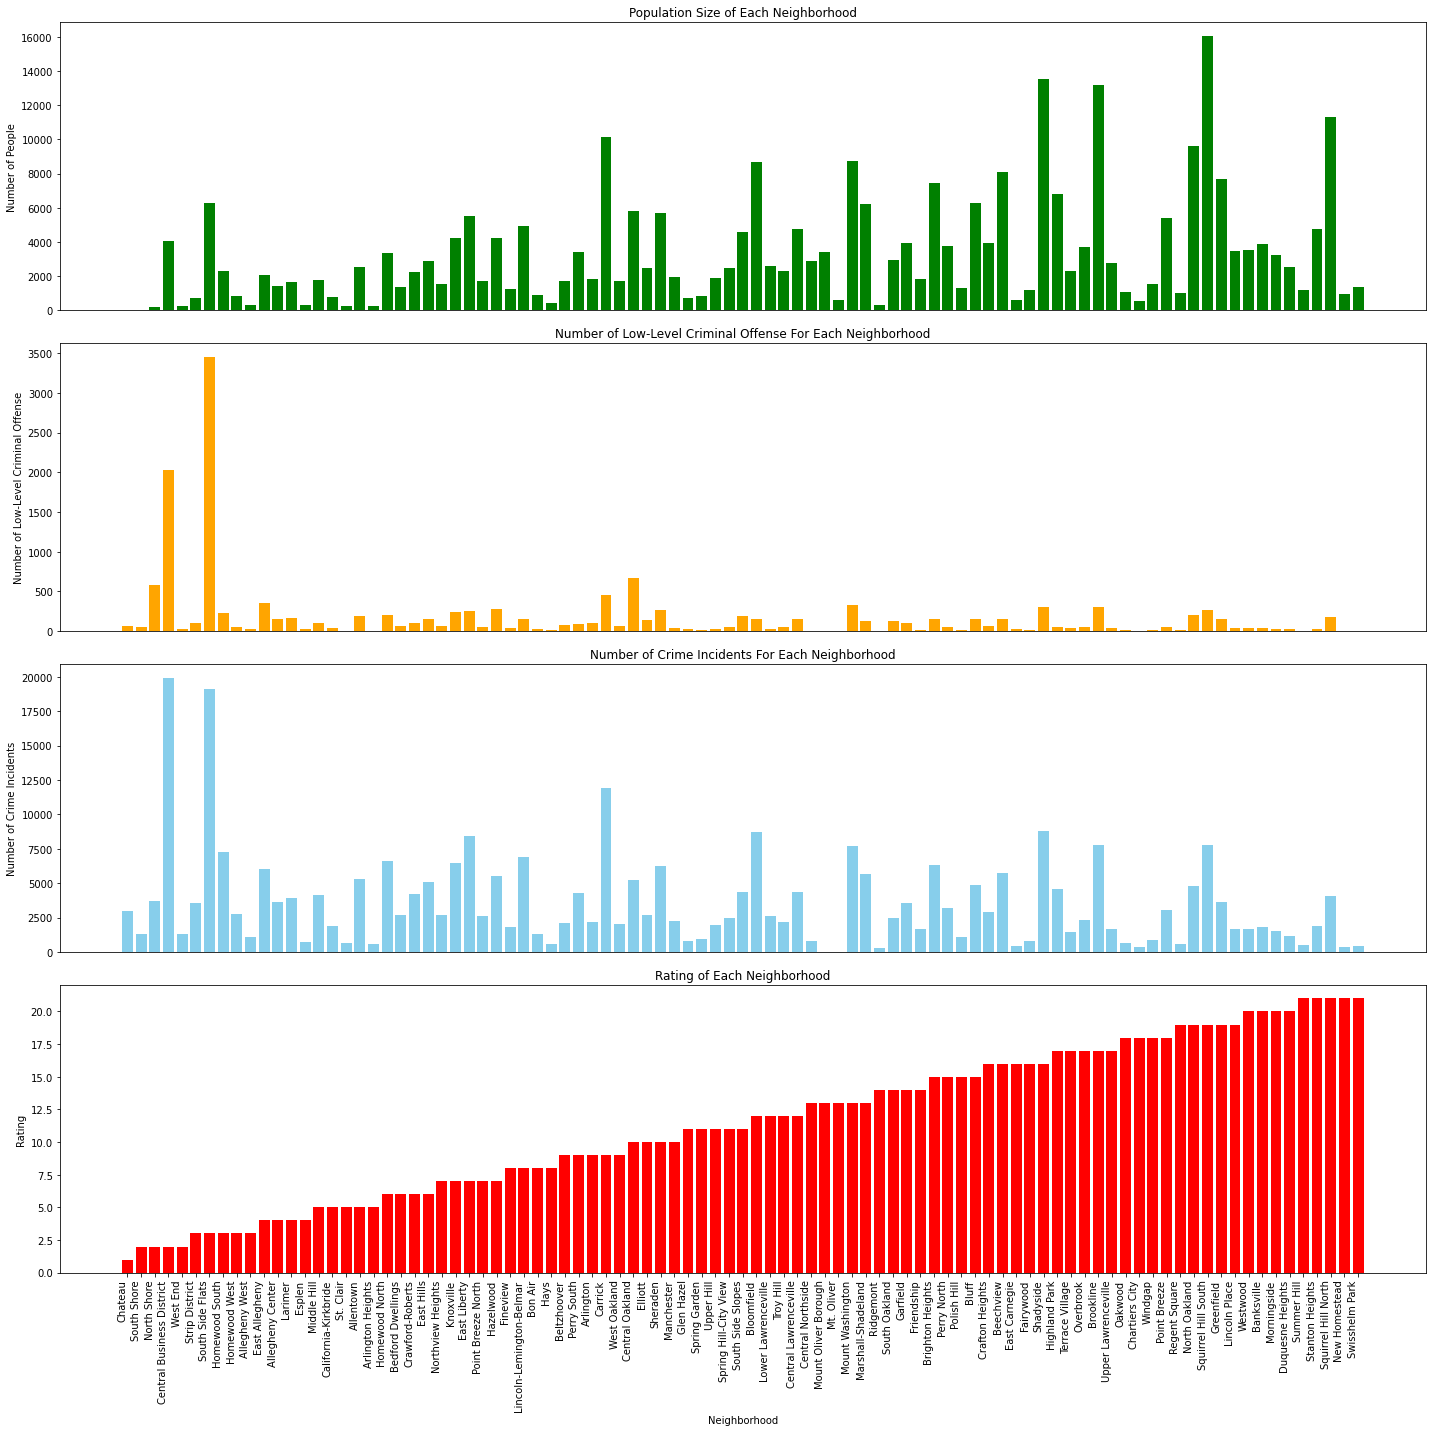

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Read the first CSV file into a DataFrame
df1 = pd.read_csv("police-incident.csv")
neighborhood_counts1 = df1['INCIDENTNEIGHBORHOOD'].value_counts()

# Read the second CSV file into a DataFrame
df2 = pd.read_csv("non-traffic-citation.csv")
neighborhood_counts2 = df2['NEIGHBORHOOD'].value_counts()

# Read the third CSV file into a DataFrame
df3 = pd.read_csv("total-population.csv")  # Replace "total-population.csv" with your third CSV file

# Define the list of neighborhoods
neighborhoods = df3['Neighborhood'].unique()

# Calculate the rating for each neighborhood using the provided formula
ratings = {}
for neighborhood in neighborhoods:
    crime_incidents = neighborhood_counts1.get(neighborhood, 0)
    low_level_offenses = neighborhood_counts2.get(neighborhood, 0)
    row = df3[df3['Neighborhood'] == neighborhood]
    
    # Check if any of the datasets have missing data for the neighborhood
    if (neighborhood not in neighborhood_counts1 or 
        neighborhood not in neighborhood_counts2 or 
        row.empty or 
        "Estimate; Total" not in row):
        # Assign a lower rating for neighborhoods with missing data in any dataset
        ratings[neighborhood] = 0  # Adjust as needed, 0 indicates the lowest rating
    else:
        population = row["Estimate; Total"].iloc[0] if "Estimate; Total" in row else 8000
        # Adjusted formula with inverted rating
        rating = 1 - ((crime_incidents + low_level_offenses * 3) / population)
        ratings[neighborhood] = rating
        
# Sort neighborhoods based on their ratings, considering missing data
sorted_neighborhoods = sorted(ratings.keys(), key=lambda x: (ratings[x], x))

# Divide the sorted neighborhoods into 10 percentiles and assign ratings from 1 to 20 accordingly
percentiles = np.percentile(list(ratings.values()), np.linspace(0, 100, 21))
neighborhood_ratings = {}
for neighborhood in sorted_neighborhoods:
    rating = np.searchsorted(percentiles, ratings[neighborhood]) + 1
    neighborhood_ratings[neighborhood] = rating

# Get counts for each neighborhood from the first two datasets, handling missing values
counts1 = [neighborhood_counts1.get(neighborhood, 0) for neighborhood in sorted_neighborhoods]
counts2 = [neighborhood_counts2.get(neighborhood, 0) for neighborhood in sorted_neighborhoods]

# Extract the data from the column you want to use in the third dataset
data3 = []
for neighborhood in sorted_neighborhoods:
    row = df3[df3['Neighborhood'] == neighborhood]
    if not row.empty and "Estimate; Total" in row:
        data3.append(row.iloc[0]["Estimate; Total"])
    else:
        data3.append(0)

# Plotting all datasets together
plt.figure(figsize=(20, 20))

# Plotting the third dataset
plt.subplot(4, 1, 1)
plt.bar(sorted_neighborhoods, data3, color='green')  # Using the data directly from the third dataset
plt.title('Population Size of Each Neighborhood')
plt.ylabel('Number of People')
plt.xticks(rotation=90, ha='right')
plt.gca().axes.get_xaxis().set_visible(False)  # Hide x-axis for the third graph

# Plotting the second dataset
plt.subplot(4, 1, 2)
plt.bar(sorted_neighborhoods, counts2, color='orange')
plt.title('Number of Low-Level Criminal Offense For Each Neighborhood')
plt.ylabel('Number of Low-Level Criminal Offense')
plt.xticks(rotation=90, ha='right')
plt.gca().axes.get_xaxis().set_visible(False)  # Hide x-axis for the second graph

# Plotting the first dataset
plt.subplot(4, 1, 3)
plt.bar(sorted_neighborhoods, counts1, color='skyblue')
plt.title('Number of Crime Incidents For Each Neighborhood')
plt.ylabel('Number of Crime Incidents')
plt.xticks(rotation=90, ha='right')
plt.gca().axes.get_xaxis().set_visible(False)  # Hide x-axis for the first graph

# Plotting the fourth dataset (ratings)
plt.subplot(4, 1, 4)
plt.bar(sorted_neighborhoods, [neighborhood_ratings[neighborhood] for neighborhood in sorted_neighborhoods], color='red')
plt.title('Rating of Each Neighborhood')
plt.ylabel('Rating')
plt.xlabel('Neighborhood')
plt.xticks(rotation=90, ha='right')

plt.tight_layout()
plt.show()

#### **NOTE:** According to my rating scale, we can see here that Summer Hill, Stanton Heights, Squirrel Hill North, and New Homestead, and Swisshelm Park were all in the top five percent safest neighborhoods.

### **SUBMETRIC 2: EDUCATION** 

#### First I will use the formula: (Bachelors*1.5 + Highschool Diplomas)/(Population) to give each neighborhood a education score. From there, I will I will break up the education scores into fifth percentiles which correlate to a revised score from 1-20 (1 being 5th percentile and 20 being 100th percentile). 

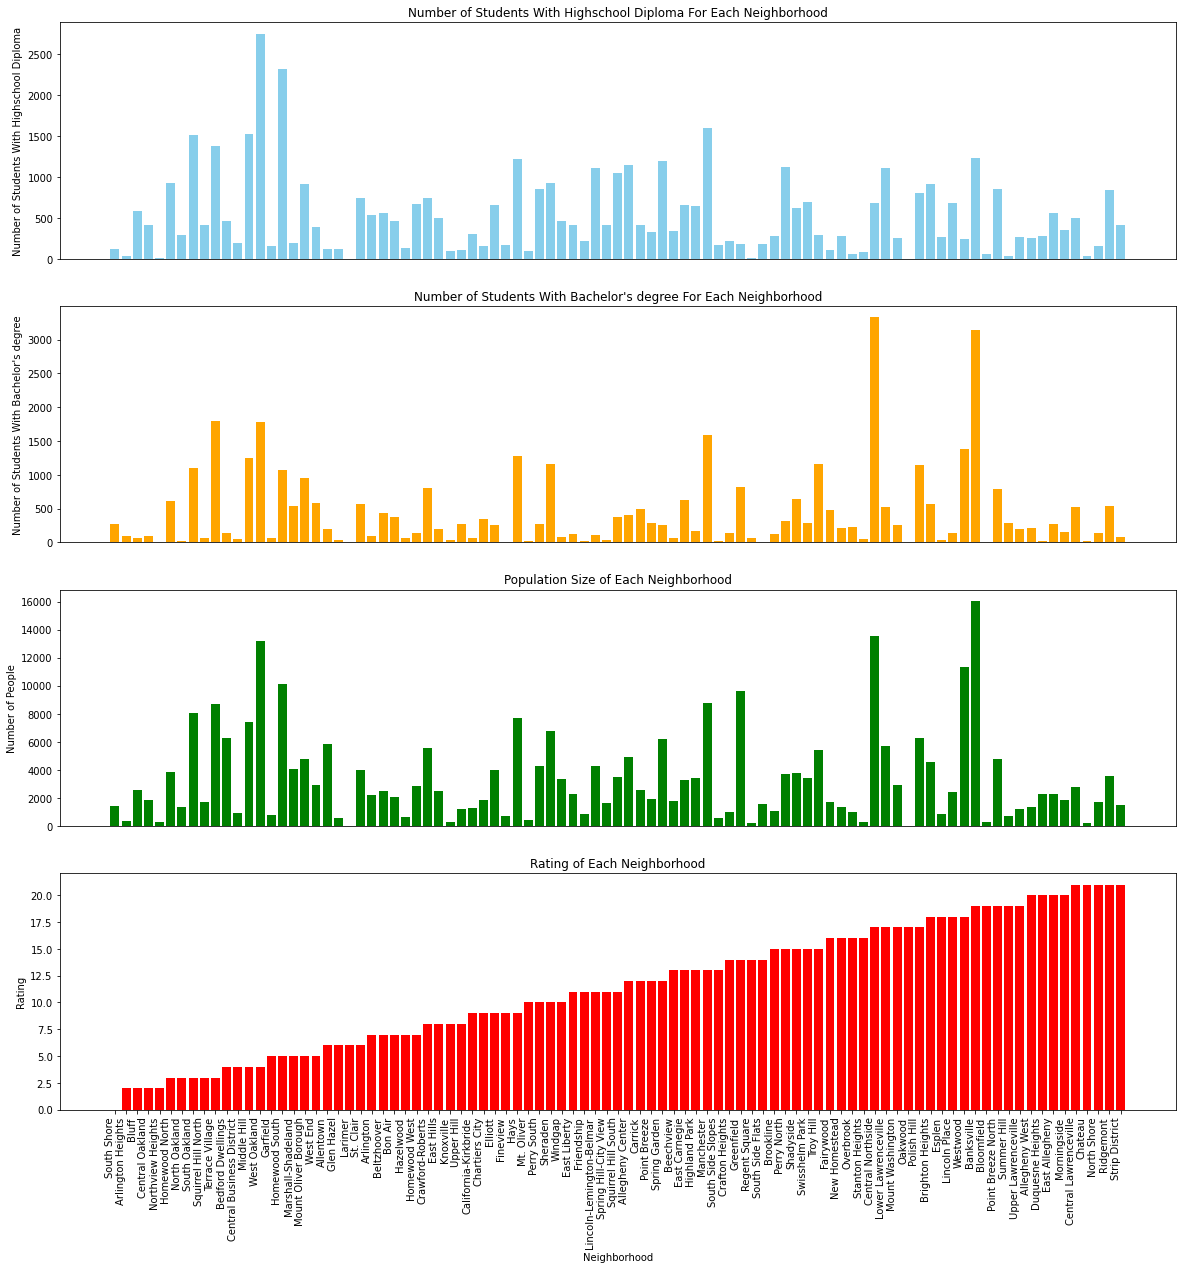

In [6]:
# Read the CSV files into DataFrames
df4 = pd.read_csv("educational-attainment.csv")  # Educational attainment data

# Extracting data from the columns
high_school_diploma = df4['Estimate; Total: - Regular high school diploma']
bachelors_degree = df4["Estimate; Total: - Bachelor's degree"]

# Calculate the ratings for each neighborhood
# Calculate the ratings for the educational attainment graph
ratings2 = {}
for neighborhood in df3['Neighborhood']:
    population_row = df3[df3['Neighborhood'] == neighborhood]
    if not population_row.empty and "Estimate; Total" in population_row:
        population = population_row.iloc[0]["Estimate; Total"]
        bachelors = bachelors_degree[df4['Neighborhood'] == neighborhood].iloc[0]
        diplomas = high_school_diploma[df4['Neighborhood'] == neighborhood].iloc[0]
        score = ((bachelors * 1.5) + diplomas) / (population)
        ratings2[neighborhood] = score
    else:
        ratings2[neighborhood] = 0  # Assign 0 rating for neighborhoods with missing population data

# Divide the ratings into 10 percentiles and assign ratings from 1 to 20 accordingly
percentiles = np.percentile(list(ratings2.values()), np.linspace(0, 100, 21))
neighborhood_ratings = {}
for i, neighborhood in enumerate(df3['Neighborhood']):
    if ratings2[neighborhood] != 0:  # Check if rating exists for the neighborhood
        rating = np.searchsorted(percentiles, ratings2[neighborhood]) + 1
        neighborhood_ratings[neighborhood] = rating
    else:
        neighborhood_ratings[neighborhood] = 0  # Assign 0 rating for neighborhoods with missing population data

# Get unique neighborhoods
neighborhoods = df3['Neighborhood']

# Sort neighborhoods based on their ratings
sorted_neighborhoods = sorted(neighborhoods, key=lambda x: (neighborhood_ratings[x], x))

# Plotting all datasets together
plt.figure(figsize=(20, 20))

# Plotting the first dataset (High School Diploma)
plt.subplot(4, 1, 1)
plt.bar(sorted_neighborhoods, high_school_diploma[df4['Neighborhood'].isin(sorted_neighborhoods)], color='skyblue')  # Using the data directly from the first dataset
plt.title("Number of Students With Highschool Diploma For Each Neighborhood")
plt.ylabel("Number of Students With Highschool Diploma")
plt.xticks(rotation=90, ha='right')
plt.gca().axes.get_xaxis().set_visible(False)  # Hide x-axis for the third graph
# Plotting the second dataset (Bachelor's degree)
plt.subplot(4, 1, 2)
plt.bar(sorted_neighborhoods, bachelors_degree[df4['Neighborhood'].isin(sorted_neighborhoods)], color='orange')  # Using the data directly from the second dataset
plt.title("Number of Students With Bachelor's degree For Each Neighborhood")
plt.ylabel("Number of Students With Bachelor's degree")
plt.xticks(rotation=90, ha='right')
plt.gca().axes.get_xaxis().set_visible(False)  # Hide x-axis for the third graph
# Plotting the third dataset (Population)
plt.subplot(4, 1, 3)
plt.bar(sorted_neighborhoods, df3["Estimate; Total"][df3['Neighborhood'].isin(sorted_neighborhoods)], color='green')  # Using the data directly from the third dataset
plt.title('Population Size of Each Neighborhood')
plt.ylabel('Number of People')
plt.xticks(rotation=90, ha='right')
plt.gca().axes.get_xaxis().set_visible(False)  # Hide x-axis for the third graph

# Plotting the fourth dataset (Ratings)
plt.subplot(4, 1, 4)
plt.bar(sorted_neighborhoods, [neighborhood_ratings[neighborhood] for neighborhood in sorted_neighborhoods], color='red')  # Using the data directly from the fourth dataset
plt.title('Rating of Each Neighborhood')
plt.ylabel('Rating')
plt.xlabel('Neighborhood')
plt.xticks(rotation=90, ha='right')
plt.show()

#### **NOTE:** According to my rating scale, we can see here that Central Lawrence, Chateu, North Shore, Ridgemont, and Strip Distinct were all in the top five percent most educated neighborhoods.

### **SUBMETRIC 3: COST OF LIVING** 

#### First I will use the formula: (Mortgage*1.2 + Rent) to give each neighborhood a cost score. From there, I will I will break up the cost scores into fifth percentiles which correlate to a revised score from 1-20 (1 being 100th percentile and 20 being 5th percentile). To clarify, the lower score should be higher cost, so the revised score inverts the cost scores appropriately.

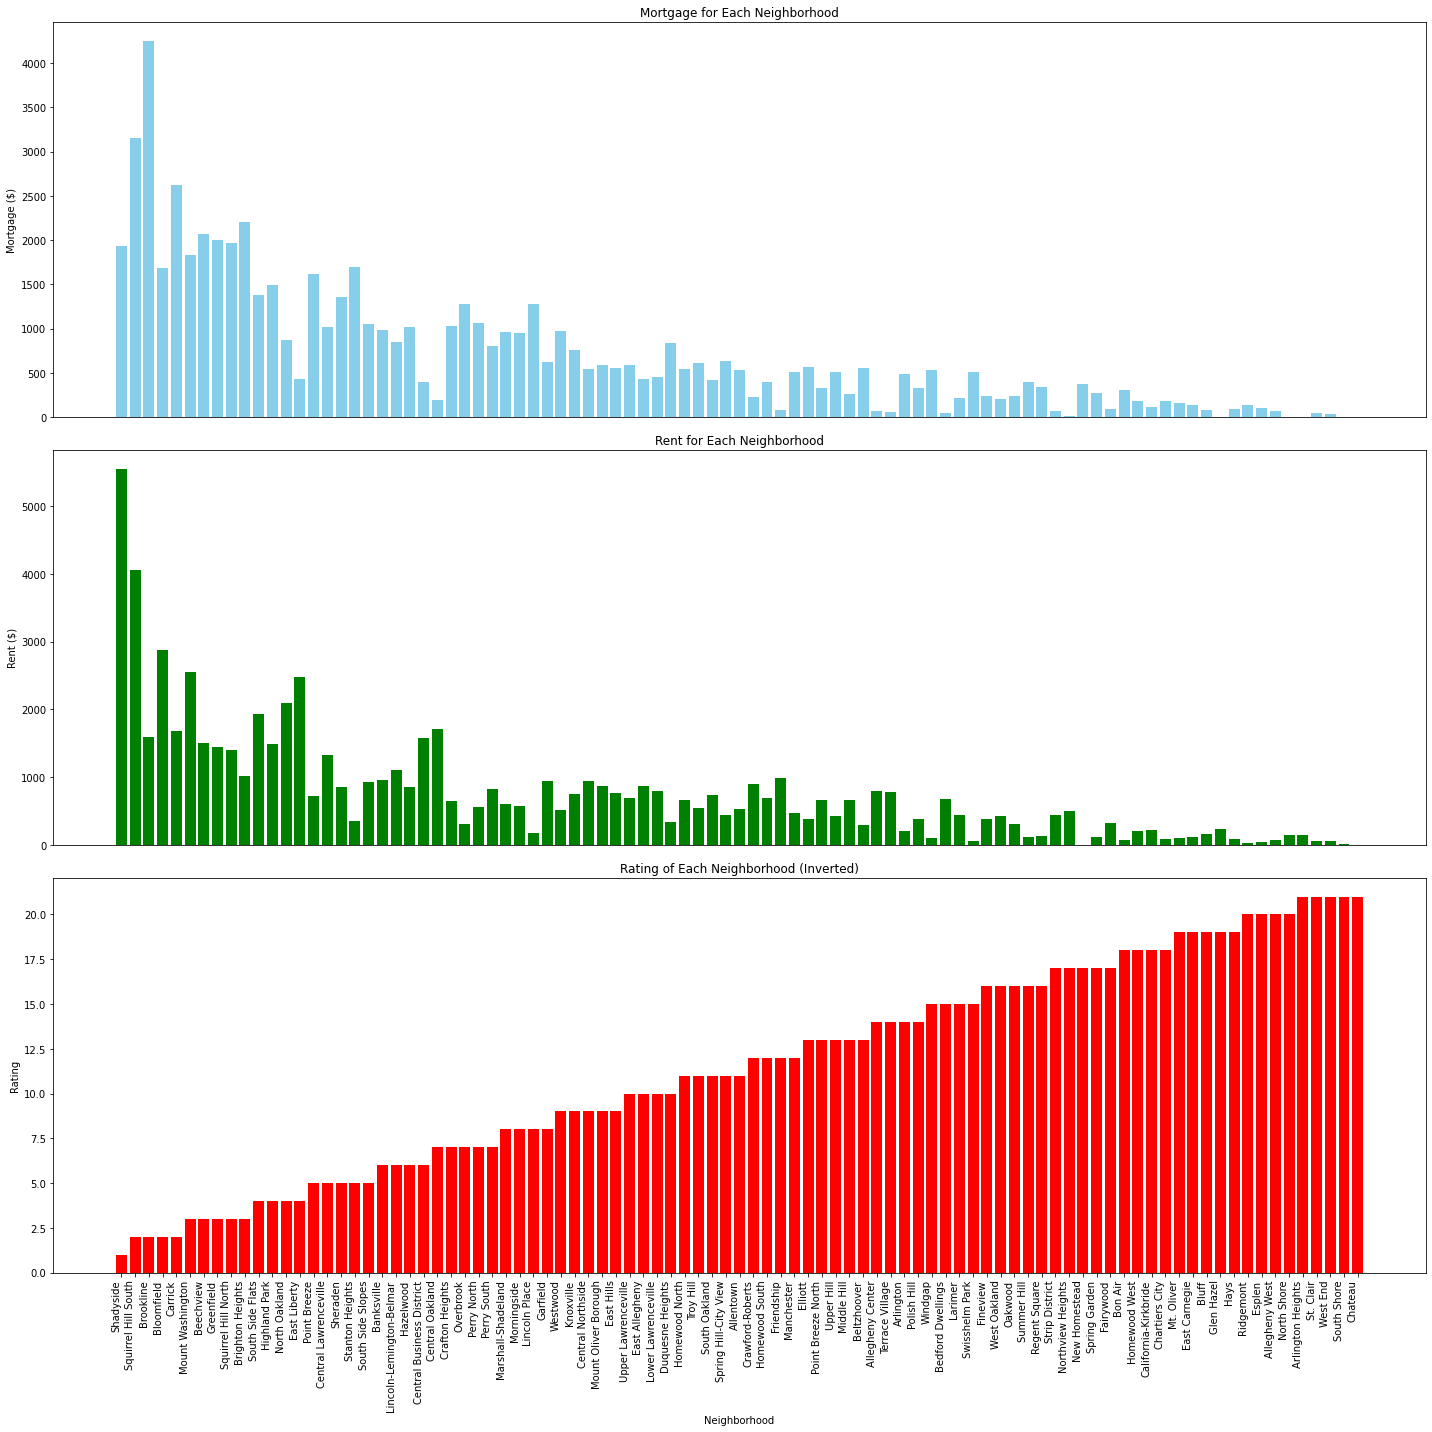

In [7]:
df5 = pd.read_csv("mortgage.csv")  
df6 = pd.read_csv("contract.csv")  

mortgage = df5['Estimate; Total:']
contract = df6['Estimate; Total:']

ratings3 = {}
for neighborhood in df5['Neighborhood']:
    mortgage_val = mortgage[df5['Neighborhood'] == neighborhood].iloc[0]
    contract_val = contract[df6['Neighborhood'] == neighborhood].iloc[0]

    try:
        mortgage_val = float(mortgage_val)
        contract_val = float(contract_val)
    except ValueError:
        # If any value cannot be converted to float, assign 0 rating
        ratings3[neighborhood] = 0
        continue

    
    rating = -1 * (mortgage_val * 1.2 + contract_val)  # Inverting the rating

    ratings3[neighborhood] = rating

# Sort neighborhoods based on their ratings
sorted_neighborhoods = sorted(ratings3.keys(), key=lambda x: (ratings3[x], x))

# Divide the ratings into 10 percentiles and assign ratings from 1 to 20 accordingly
percentiles = np.percentile(list(ratings3.values()), np.linspace(0, 100, 21))
neighborhood_ratings = {}
for neighborhood in sorted_neighborhoods:
    rating = np.searchsorted(percentiles, ratings3[neighborhood]) + 1
    neighborhood_ratings[neighborhood] = rating

# Get counts for each neighborhood from the first two datasets, handling missing values
counts1 = [mortgage[df5['Neighborhood'] == neighborhood].iloc[0] for neighborhood in sorted_neighborhoods]
counts2 = [contract[df6['Neighborhood'] == neighborhood].iloc[0] for neighborhood in sorted_neighborhoods]

# Filter out neighborhoods with missing values for the third dataset
neighborhoods_filtered = []
counts1_filtered = []
counts2_filtered = []
ratings_filtered = []

for i, neighborhood in enumerate(sorted_neighborhoods):
    neighborhoods_filtered.append(neighborhood)
    counts1_filtered.append(counts1[i])
    counts2_filtered.append(counts2[i])
    ratings_filtered.append(neighborhood_ratings[neighborhood])

# Plotting all datasets together
plt.figure(figsize=(20, 20))

# Plotting the first dataset (Mortgage)
plt.subplot(3, 1, 1)
plt.bar(neighborhoods_filtered, counts1_filtered, color='skyblue')
plt.title('Mortgage for Each Neighborhood')
plt.ylabel('Mortgage ($)')
plt.xticks(rotation=90, ha='right')
plt.gca().axes.get_xaxis().set_visible(False)  # Hide x-axis for the first graph

# Plotting the second dataset (Contract)
plt.subplot(3, 1, 2)
plt.bar(neighborhoods_filtered, counts2_filtered, color='green')
plt.title('Rent for Each Neighborhood')
plt.ylabel('Rent ($)')
plt.xticks(rotation=90, ha='right')
plt.gca().axes.get_xaxis().set_visible(False)  # Hide x-axis for the second graph

# Plotting the third dataset (Ratings)
plt.subplot(3, 1, 3)
plt.bar(neighborhoods_filtered, ratings_filtered, color='red')
plt.title('Rating of Each Neighborhood (Inverted)')
plt.ylabel('Rating')
plt.xlabel('Neighborhood')
plt.xticks(rotation=90, ha='right')

plt.tight_layout()
plt.show()

#### **NOTE:** We can see here that Arlington Heights, North Shore, St. Clair, West End, South Shore, and Chateau were all in the top five percent least costing neighborhoods according to my rating scale

### **CALCULATING OVERALL RATING**

#### I will average all three ratings each neighborhood received to see which neighborhood received the highest rating on average.

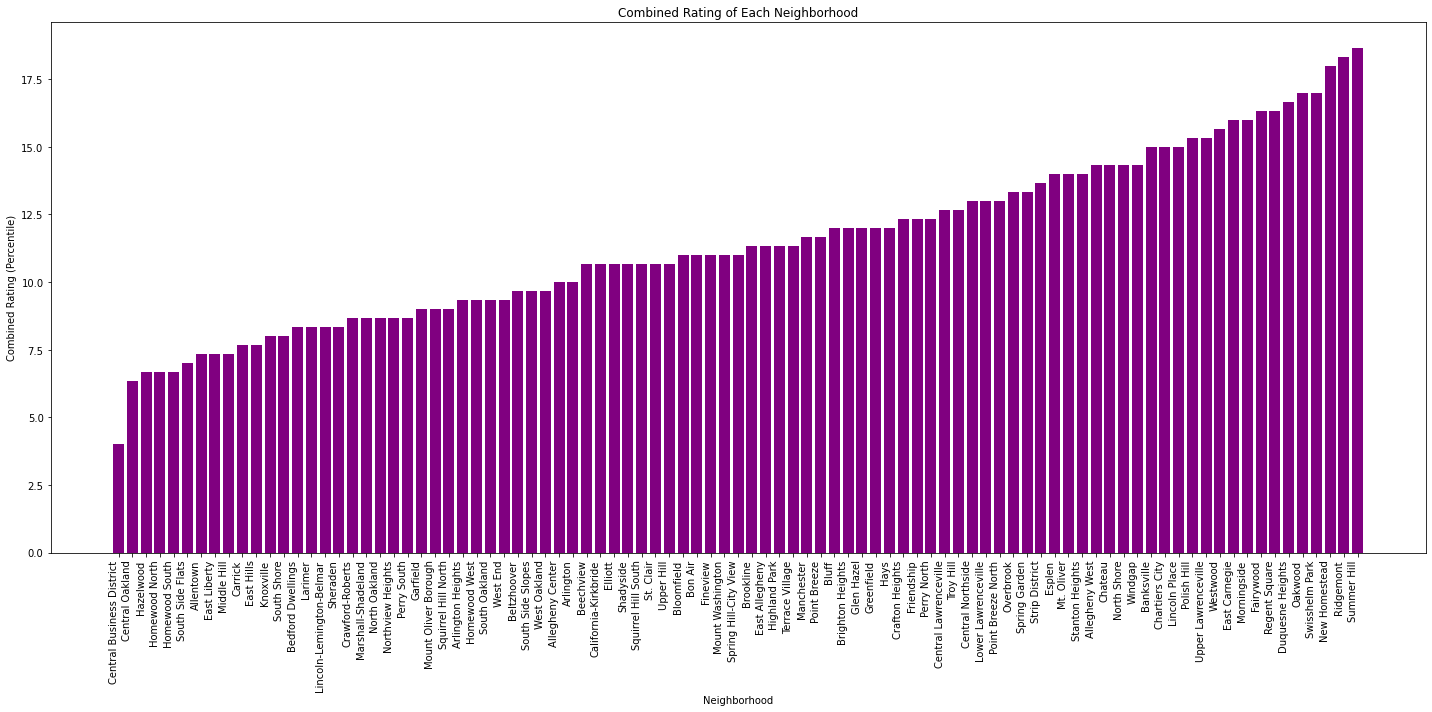

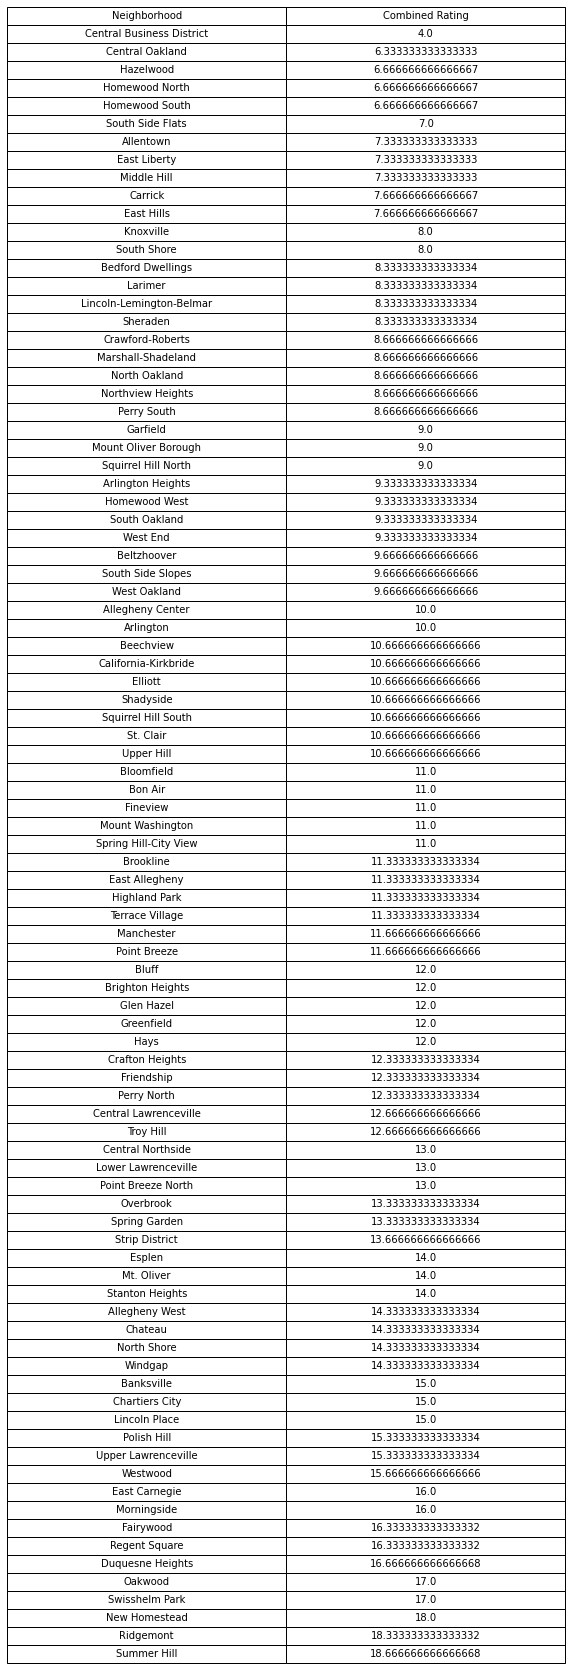

In [21]:
# Function to assign ratings to percentiles from 1 to 20
def assign_percentile_rating(ratings):
    percentiles = np.percentile(list(ratings.values()), np.linspace(0, 100, 21))
    neighborhood_percentile_ratings = {}
    for neighborhood in ratings:
        rating = np.searchsorted(percentiles, ratings[neighborhood]) + 1
        neighborhood_percentile_ratings[neighborhood] = rating
    return neighborhood_percentile_ratings

# Assign percentiles for each individual rating
percentile_ratings1 = assign_percentile_rating(ratings)
percentile_ratings2 = assign_percentile_rating(ratings2)
percentile_ratings3 = assign_percentile_rating(ratings3)

# Combine the ratings into a single rating for each neighborhood
combined_ratings = {}
for neighborhood in neighborhoods:
    rating1 = percentile_ratings1.get(neighborhood, 0)
    rating2 = percentile_ratings2.get(neighborhood, 0)
    rating3 = percentile_ratings3.get(neighborhood, 0)
    combined_rating = (rating1 + rating2 + rating3) / 3
    combined_ratings[neighborhood] = combined_rating
# Sort neighborhoods based on their combined ratings
sorted_neighborhoods = sorted(neighborhoods, key=lambda x: (combined_ratings[x], x))

# Plotting the distribution of combined ratings
plt.figure(figsize=(20, 10))
plt.bar(sorted_neighborhoods, [combined_ratings[neighborhood] for neighborhood in sorted_neighborhoods], color='purple')
plt.title('Combined Rating of Each Neighborhood')
plt.ylabel('Combined Rating (Percentile)')
plt.xlabel('Neighborhood')
plt.xticks(rotation=90, ha='right')
plt.tight_layout()
plt.show()

# Sort neighborhoods based on their combined ratings
sorted_neighborhoods = sorted(neighborhoods, key=lambda x: (combined_ratings[x], x))

# Create a table with neighborhood names and their ratings
table_data = [(neighborhood, combined_ratings[neighborhood]) for neighborhood in sorted_neighborhoods]

# Plotting the table
plt.figure(figsize=(10, 6))
table = plt.table(cellText=table_data, colLabels=['Neighborhood', 'Combined Rating'], loc='center', cellLoc='center')
table.auto_set_font_size(False)
table.set_fontsize(10)
table.scale(1, 1.5)  # Adjust table size
plt.axis('off')  # Turn off axis
plt.show()

#### **NOTE:** According to my safety rating, education rating, and cost rating, the top 5 best neighborhoods for a family to settle in is Oakwood, Swisshelm Park, New Homestead, Ridgemont, and Summer Hill, with the best neighborhood for family to settle in being Summer Hill with an overall rating of 18.66.


## Conclusion

**Relflection:** Choosing which data sets to measure which submetrics to determine the "best" Pittsburgh neighborhood was very challenging, however coming up with my own rating scale and incorporating data from multiple data sets was a lot of fun. </br>
Unfortunately, I do not have any preference towards any neighborhood in Pittsburgh nor do I know a whole lot about any specific neighborhood in Pittsburgh. Therefore, I cannot compare Summer Hill with my personal favorite neighborhood. However, I can say that I was shocked that Summer Hill was the "best" neighborhood. This is because I have never heard of the neighborhood and because, from what others have told me, Lawrenceville or Squirrel Hill was known as the best neighborhoods to live in.